In [9]:
import pandas as pd
import sys
import os
from os import listdir
os.chdir("c:/Users/Robert/Documents/Projekte/dev/sport_betting/")
import config as CONFIG
pd.set_option('display.max_columns', 500)

In [10]:
from src.data.provide_data import get_model_data
from src.models.evaluate import custom_classification_report, custom_lazy_report



In [11]:
X_test, y_test = get_model_data(filename = "Test")

Test 1952


In [12]:
X_train, y_train = get_model_data(filename = "Train")
X_valid, y_valid = get_model_data(filename = "Valid")
X_test, y_test = get_model_data(filename = "Test")

cat = [X_train.columns.get_loc(i) for i in ["Team","Div","Opponent"]]

Train 5246
Valid 1952
Test 1952


In [13]:
features = X_train.columns

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler object
scaler = StandardScaler()

# Fit scaler on training data
scaler.fit(X_train)

# Scale training and test data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

# Baseline Model

In [15]:
from lazypredict.Supervised import LazyClassifier

lazy_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazy_clf.fit(X_train, X_valid, y_train, y_valid)
models

100%|██████████| 29/29 [00:25<00:00,  1.15it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.66,0.64,0.64,0.66,0.03
NearestCentroid,0.65,0.64,0.64,0.65,0.02
BernoulliNB,0.64,0.64,0.64,0.64,0.04
Perceptron,0.68,0.64,0.64,0.67,0.03
CalibratedClassifierCV,0.68,0.62,0.62,0.66,3.52
LinearDiscriminantAnalysis,0.67,0.62,0.62,0.65,0.11
LinearSVC,0.67,0.62,0.62,0.65,0.94
RidgeClassifier,0.67,0.62,0.62,0.65,0.05
QuadraticDiscriminantAnalysis,0.63,0.62,0.62,0.64,0.09


In [16]:
custom_lazy_report(X_test,y_test,lazy_clf)

AdaBoostClassifier
BaggingClassifier
BernoulliNB
CalibratedClassifierCV
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianNB
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LinearSVC
LogisticRegression
NearestCentroid
NuSVC
PassiveAggressiveClassifier
Perceptron
QuadraticDiscriminantAnalysis
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC
XGBClassifier
LGBMClassifier


,recall,precision,auc,f_1,accuracy
LinearDiscriminantAnalysis,0.68,0.68,0.71,0.48,0.68
CalibratedClassifierCV,0.69,0.69,0.71,0.48,0.69
GaussianNB,0.66,0.66,0.71,0.57,0.66
LogisticRegression,0.68,0.68,0.71,0.48,0.68
BernoulliNB,0.64,0.64,0.70,0.58,0.64
ExtraTreesClassifier,0.67,0.67,0.69,0.51,0.67
LGBMClassifier,0.66,0.66,0.69,0.50,0.66
AdaBoostClassifier,0.66,0.66,0.69,0.42,0.66
RandomForestClassifier,0.67,0.67,0.69,0.50,0.67
XGBClassifier,0.64,0.64,0.68,0.48,0.64


## Gridsearch für bestes Baseline Model

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define the parameter grid to search over
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0],
              'binarize': [0.0, 0.5, 1.0, 1.5]}

# Create a BernoulliNB model
bnb = BernoulliNB()

# Create a GridSearchCV object to perform grid search
grid_search = GridSearchCV(bnb, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'alpha': 0.01, 'binarize': 1.0}


In [18]:
bnb = BernoulliNB(alpha=10,binarize=0.5)
bnb.fit(X_train,y=y_train)

BernoulliNB(alpha=10, binarize=0.5)

In [19]:
custom_classification_report(X = X_test,y = y_test,model = bnb)

              precision    recall  f1-score   support

       False       0.72      0.78      0.75      1212
        True       0.58      0.50      0.54       740

    accuracy                           0.67      1952
   macro avg       0.65      0.64      0.64      1952
weighted avg       0.67      0.67      0.67      1952

AUC 0.703


# Transformer

## Pretrainer

In [20]:

import torch

from pytorch_tabnet.pretraining import TabNetPretrainer

# Define pretrainer model architecture
pretrainer = TabNetPretrainer(
optimizer_fn=torch.optim.Adam,
optimizer_params=dict(lr=2e-2),
mask_type="entmax"
)

# Train pretrainer model on training data
pretrainer.fit(
    X_train=X_train,
    eval_set=[X_valid],
    max_epochs=1000,
    patience=30,
    pretraining_ratio=0.8,
    batch_size= 64
)


epoch 0  | loss: 1.4805  | val_0_unsup_loss_numpy: 1.143489956855774|  0:00:03s
epoch 1  | loss: 0.65521 | val_0_unsup_loss_numpy: 1.0907200574874878|  0:00:06s
epoch 2  | loss: 0.56357 | val_0_unsup_loss_numpy: 1.0293699502944946|  0:00:10s
epoch 3  | loss: 0.53119 | val_0_unsup_loss_numpy: 1.0832699537277222|  0:00:13s
epoch 4  | loss: 0.51702 | val_0_unsup_loss_numpy: 1.0482300519943237|  0:00:16s
epoch 5  | loss: 0.51128 | val_0_unsup_loss_numpy: 1.0086300373077393|  0:00:19s
epoch 6  | loss: 0.49338 | val_0_unsup_loss_numpy: 1.0160800218582153|  0:00:22s
epoch 7  | loss: 0.47817 | val_0_unsup_loss_numpy: 1.0131499767303467|  0:00:25s
epoch 8  | loss: 0.49108 | val_0_unsup_loss_numpy: 1.1751999855041504|  0:00:28s
epoch 9  | loss: 0.47411 | val_0_unsup_loss_numpy: 1.0199400186538696|  0:00:32s
epoch 10 | loss: 0.48132 | val_0_unsup_loss_numpy: 0.9950299859046936|  0:00:35s
epoch 11 | loss: 0.47406 | val_0_unsup_loss_numpy: 0.9947900176048279|  0:00:38s
epoch 12 | loss: 0.48345 | va

## Modellfitting

In [21]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from pytorch_tabnet.tab_model import TabNetClassifier

# Define hyperparameters
n_d = 8
n_a = 8
n_steps = 3
gamma = 1
lambda_sparse = 0.001
lr = 2e-2
batch_size = 128
max_epochs = 1000

# Create TabNet classifier
clf = TabNetClassifier(cat_idxs = cat,n_d=n_d, n_a=n_a, n_steps=n_steps, gamma=gamma, lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr=lr), mask_type='entmax', device_name='cuda' if torch.cuda.is_available() else 'cpu')
# Train TabNet classifier
clf.fit(X_train=X_train, y_train=y_train,     eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'], eval_metric=['balanced_accuracy','auc'],batch_size=batch_size, max_epochs=max_epochs, patience=50,from_unsupervised=pretrainer)

epoch 0  | loss: 0.70456 | train_balanced_accuracy: 0.5465  | train_auc: 0.70113 | valid_balanced_accuracy: 0.55082 | valid_auc: 0.67949 |  0:00:02s
epoch 1  | loss: 0.59989 | train_balanced_accuracy: 0.63611 | train_auc: 0.71205 | valid_balanced_accuracy: 0.62803 | valid_auc: 0.70231 |  0:00:04s
epoch 2  | loss: 0.59733 | train_balanced_accuracy: 0.61537 | train_auc: 0.7134  | valid_balanced_accuracy: 0.6115  | valid_auc: 0.70707 |  0:00:06s
epoch 3  | loss: 0.60307 | train_balanced_accuracy: 0.62174 | train_auc: 0.71396 | valid_balanced_accuracy: 0.62525 | valid_auc: 0.70715 |  0:00:09s
epoch 4  | loss: 0.59913 | train_balanced_accuracy: 0.64356 | train_auc: 0.71577 | valid_balanced_accuracy: 0.64079 | valid_auc: 0.70421 |  0:00:11s
epoch 5  | loss: 0.59963 | train_balanced_accuracy: 0.60503 | train_auc: 0.71492 | valid_balanced_accuracy: 0.61209 | valid_auc: 0.7075  |  0:00:13s
epoch 6  | loss: 0.59754 | train_balanced_accuracy: 0.60646 | train_auc: 0.71645 | valid_balanced_accuracy

## Evaluierung

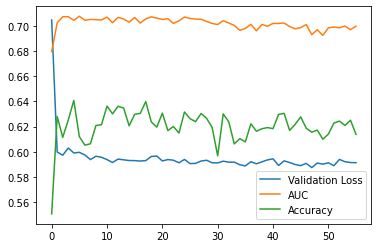

              precision    recall  f1-score   support

       False       0.68      0.91      0.78      1212
        True       0.67      0.29      0.40       740

    accuracy                           0.68      1952
   macro avg       0.67      0.60      0.59      1952
weighted avg       0.67      0.68      0.64      1952



In [22]:
from matplotlib import pyplot as plt

plt.plot(clf.history['loss'], label='Validation Loss')
plt.plot(clf.history['valid_auc'], label='AUC')
plt.plot(clf.history['valid_balanced_accuracy'], label='Accuracy')

plt.legend()
plt.show()

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
r = classification_report(y_pred=y_pred,y_true=y_test)
print(r)

## Erklärbarkeit

In [23]:
f_i = pd.Series(clf.feature_importances_)
f_i.index = features
f_i.sort_values(ascending=False)

B365_Team_odd_pred                  0.14
B365_Draw                           0.14
IW_Team_last_4_games                0.12
BW_Team_odd_pred                    0.11
Avg_Draw                            0.10
BW_opponent_odd_pred_last_4_games   0.07
BW_Opponent                         0.05
Avg_Opponent_last_4_games           0.05
Min_Opponent                        0.04
BW_opponent_odd_pred                0.04
IW_Draw                             0.04
Max_Draw                            0.03
Span_Draw_last_4_games              0.03
B365_Opponent_last_4_games          0.02
IW_Team_odd_pred                    0.01
B365_Team_last_4_games              0.01
Max_Team                            0.00
Avg_Opponent                        0.00
IW_Opponent                         0.00
BW_Draw                             0.00
Max_Opponent                        0.00
Avg_Team                            0.00
Min_Draw                            0.00
IW_Team                             0.00
BW_Team         

In [24]:
"BW_opponent_odd_pred","B365_Opponent","Avg_Opponent","IW_Team","Span_Draw"      

('BW_opponent_odd_pred',
 'B365_Opponent',
 'Avg_Opponent',
 'IW_Team',
 'Span_Draw')

In [25]:
sum(f_i>0.01)

15